## Text preprocessing

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
## read the different files where I saved different job positions
all_files = glob.glob(r"C:\Users\nikos\Desktop\data_class" + "/*.csv")

job_list = []

for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        job_list.append(df)
        
df = pd.concat(job_list, axis=0, ignore_index=True)

In [3]:
## Inspect the data frame
print(df.shape)
df.head()

(1468, 8)


,Job type,Job Title,Job Url,Company,Location,Summary,Posting Date,Desc
0,Admin,Weekend Receptionist,http://www.indeed.com/rc/clk?jk=fc8eea88550c6c...,Priory Group,London,(Maternity cover 12 month/fixed contract).\nEn...,1 day ago,Priory Healthcare is the UK’s leading provider...
1,Admin,ADMINISTRATOR,http://www.indeed.com/rc/clk?jk=bb43950c0a55c2...,Birkbeck University of London,London,You will provide administrative support to a r...,3 days ago,You will provide administrative support to a r...
2,Admin,Data Entry and Admin Clerk Required,http://www.indeed.com/rc/clk?jk=415d0f0673da28...,JH Recruiters,London,Proven experience in a high volume office and ...,14 days ago,"Job Overview:Because of our growth, we are loo..."
3,Admin,Test Administrator - High Holborn,http://www.indeed.com/rc/clk?jk=f88bcc9dacdb52...,Pearson,London,This is strictly a part-time position and will...,8 days ago,DescriptionTest AdministratorPearson VUE (www....
4,Admin,Administrator/Customer Service,http://www.indeed.com/company/Griffin-Scaffold...,Griffin Scaffolding London,North London,Candidate would be responsible for answering p...,3 days ago,Candidate would be responsible for answering p...


In [4]:
## Check for null values 
df.isnull().any()

Job type        False
Job Title       False
Job Url         False
Company         False
Location        False
Summary         False
Posting Date    False
Desc            False
dtype: bool

In [5]:
## Checking for duplicates
df = df.drop_duplicates(subset=['Job Url'])

In [6]:
## Print the shape
df.shape

(1236, 8)

In [7]:
domains = df.groupby("Job type").count()
domains["Job Title"]

Job type
Admin            153
Analyst          159
Finance          166
Warehouse        150
cleaner          150
hospitality      144
recruitment      152
web developer    162
Name: Job Title, dtype: int64

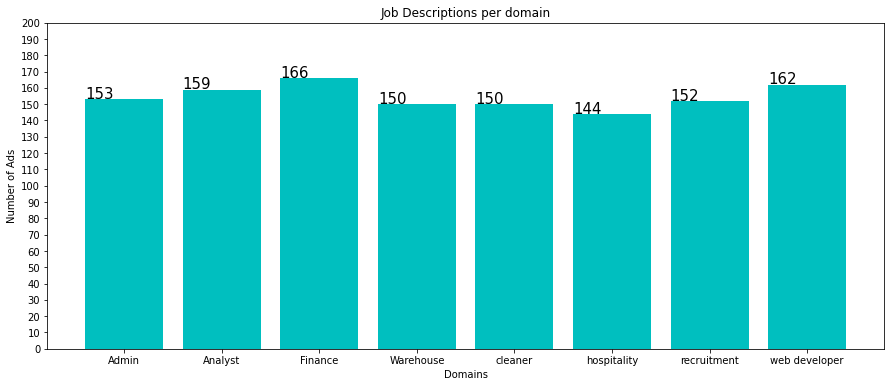

In [8]:
plt.figure(figsize=(15,6))
x = [i for i, df in df.groupby("Job type")]

plt.title("Job Descriptions per domain")

bars = plt.bar(x, domains["Job Title"], color="c")

plt.yticks(np.arange(0,201,10))
plt.xlabel('Domains')
plt.ylabel('Number of Ads')

for bar in bars:
    xval = bar.get_width()
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .5, yval, fontsize=15)
    
plt.show()

In [9]:
## Check the lenght distribution
df["Desc_Lenght"] = df["Desc"].str.len()
df["Desc_Lenght"].describe()

count     1236.000000
mean      2595.838997
std       1670.148536
min        138.000000
25%       1421.250000
50%       2208.000000
75%       3413.250000
max      13152.000000
Name: Desc_Lenght, dtype: float64

C:\Users\nikos\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


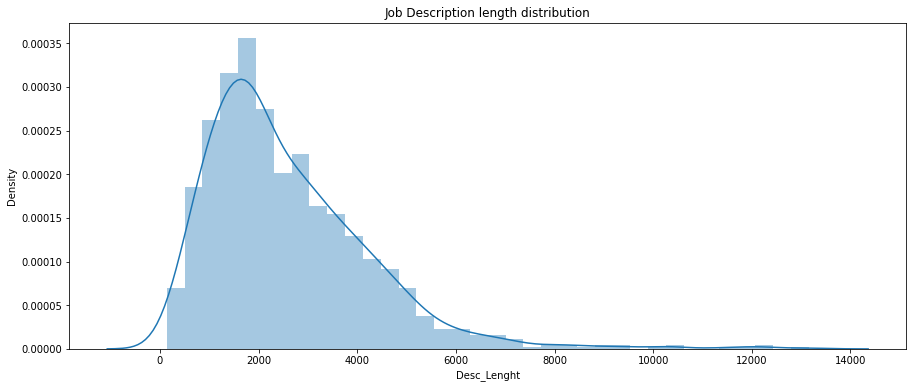

In [10]:
## Plot the lenght distribution
plt.figure(figsize=(15,6))
sn.distplot(df['Desc_Lenght']).set_title('Job Description length distribution')
plt.show()

<AxesSubplot:xlabel='Job type', ylabel='Desc_Lenght'>

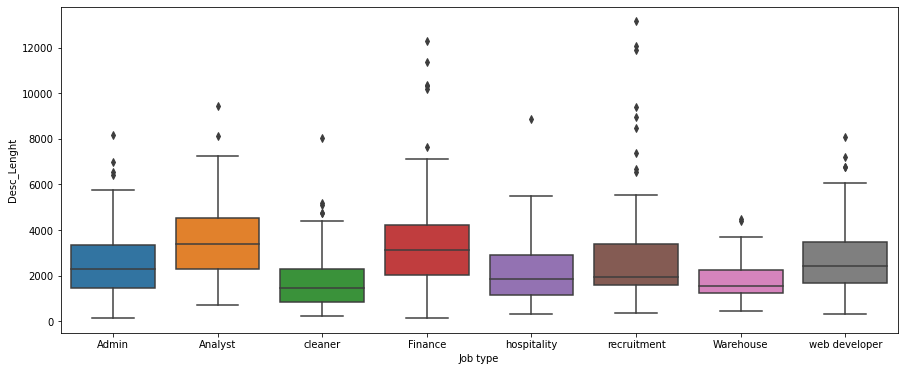

In [11]:
## Chech the lenght of the job description per category
plt.figure(figsize=(15,6))
sn.boxplot(data=df, x='Job type', y='Desc_Lenght')

In [12]:
## Drop the outliers of the desc_lenght column
Q1 = df["Desc_Lenght"].quantile(0.25)
Q3 =df["Desc_Lenght"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print(Lower_Whisker, Upper_Whisker)

df = df[df["Desc_Lenght"] < Upper_Whisker]

1992.0
-1566.75 6401.25


In [13]:
df.shape

(1201, 9)

<AxesSubplot:xlabel='Job type', ylabel='Desc_Lenght'>

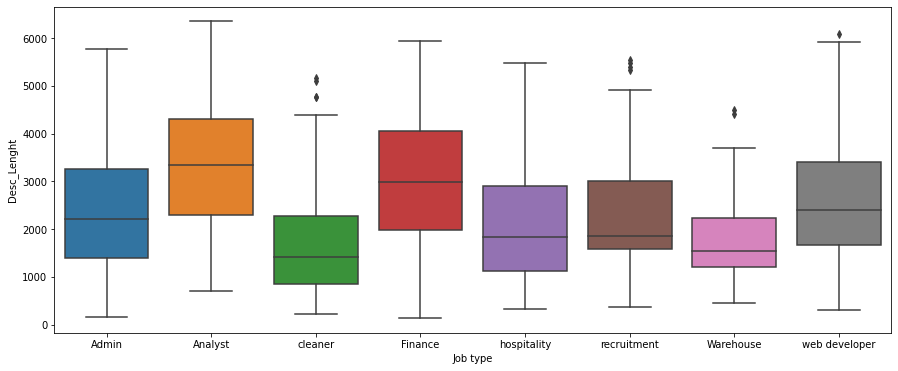

In [14]:
plt.figure(figsize=(15,6))
sn.boxplot(data=df, x='Job type', y='Desc_Lenght')

In [15]:
df["Job type"].unique()

array(['Admin', 'Analyst', 'cleaner', 'Finance', 'hospitality',
       'recruitment', 'Warehouse', 'web developer'], dtype=object)

In [16]:
## Six different labels to predict 
## inspect How balanced are the observations
dom_num = df.groupby("Job type").count()
dom_num["Job Title"]

Job type
Admin            149
Analyst          151
Finance          158
Warehouse        150
cleaner          149
hospitality      143
recruitment      143
web developer    158
Name: Job Title, dtype: int64

In [17]:
df.head()

,Job type,Job Title,Job Url,Company,Location,Summary,Posting Date,Desc,Desc_Lenght
0,Admin,Weekend Receptionist,http://www.indeed.com/rc/clk?jk=fc8eea88550c6c...,Priory Group,London,(Maternity cover 12 month/fixed contract).\nEn...,1 day ago,Priory Healthcare is the UK’s leading provider...,1114
1,Admin,ADMINISTRATOR,http://www.indeed.com/rc/clk?jk=bb43950c0a55c2...,Birkbeck University of London,London,You will provide administrative support to a r...,3 days ago,You will provide administrative support to a r...,2812
2,Admin,Data Entry and Admin Clerk Required,http://www.indeed.com/rc/clk?jk=415d0f0673da28...,JH Recruiters,London,Proven experience in a high volume office and ...,14 days ago,"Job Overview:Because of our growth, we are loo...",1277
3,Admin,Test Administrator - High Holborn,http://www.indeed.com/rc/clk?jk=f88bcc9dacdb52...,Pearson,London,This is strictly a part-time position and will...,8 days ago,DescriptionTest AdministratorPearson VUE (www....,5075
4,Admin,Administrator/Customer Service,http://www.indeed.com/company/Griffin-Scaffold...,Griffin Scaffolding London,North London,Candidate would be responsible for answering p...,3 days ago,Candidate would be responsible for answering p...,1056


In [18]:
## Keep the columns that we need for building the model
df = df[["Desc", "Job type"]]

In [19]:
## Let's map the target column
encode = {'Admin':0, 'Analyst':1, 'cleaner':2, 'Finance':3, 'hospitality':4,
       'recruitment':5, 'Warehouse':6, 'web developer':7}

In [20]:
df["target"] = df["Job type"].map(encode)
df["target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

### Next step text preprocessing

In [21]:
## text preprocessing 
import nltk 

nltk.download('punkt') 

nltk.download('averaged_perceptron_tagger') 

nltk.download('wordnet') 

    
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 

  

from nltk.corpus import stopwords 

nltk.download('stopwords') 

stop_words = set(stopwords.words('english')) 


VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nikos\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
## Apply a text manipulation function
def preprocess_sentences(text): 

    text = text.lower() 
    temp_sent =[] 
    words = nltk.word_tokenize(text) 
    tags = nltk.pos_tag(words) 
    
    for i, word in enumerate(words): 
        if tags[i][1] in VERB_CODES:   
            lemmatized = lemmatizer.lemmatize(word, 'v') 
        else: 
            lemmatized = lemmatizer.lemmatize(word) 
        if lemmatized not in stop_words and lemmatized.isalpha(): 
            temp_sent.append(lemmatized) 

    finalsent = ' '.join(temp_sent) 
    finalsent = finalsent.replace("n't", " not") 
    finalsent = finalsent.replace("'m", " am") 
    finalsent = finalsent.replace("'s", " is") 
    finalsent = finalsent.replace("'re", " are") 
    finalsent = finalsent.replace("'ll", " will") 
    finalsent = finalsent.replace("'ve", " have") 
    finalsent = finalsent.replace("'d", " would") 

    return finalsent 

In [23]:
## Creating a new column where we applied the text manipulation function 
df["Desc proc"] = df["Desc"].apply(preprocess_sentences) 
new_df = df[["Desc proc", "target"]]

In [24]:
## after preprocessing
new_df["Desc proc"][23]

'facility service desk operativeour building service business look facility service desk operative join team primary function role contribute effective efficient operation city london facility service desk ensure contractual obligation around reactive task performance meet manage distribution closing reactive task liaise skanska engineer subcontractor provide focal point client enquiriesyou provide day day management cafm system ensure meet contractual obligationsproactively monitor manage outstanding reactive task ensure cafm system date timesliaise technical staff supervisor manager building user appropriate ensure accurate relevant timely communication maintain timescoordinate skanska supply chain engineer ensure contractual obligation meet relevant sheet provide close reactive task downsupport generation detailed report cafm system incorporation skanska client monthly reportwe look working role require high volume data communication skill verbal write first class customer service s

In [25]:
## before preprocessing
df["Desc"][23]

'Facilities Service Desk OperativeOur Building Services business is looking for a Facilities Service Desk Operative to join the team in the Guildhall.The primary function of the role is to contribute to the effective and efficient operation of the City of London Facilities Service Desk to ensure contractual obligations around all reactive task performance are met. Managing the distribution and closing of reactive tasks, liaising with Skanska Engineers and Subcontractors and providing a focal point for client enquiriesYou’ll:Provide day to day management of the CAFM system to ensure we meet our contractual obligationsProactively monitor and manage outstanding all reactive tasks ensure the CAFM system is up to date at all timesLiaise with Technical Staff, Supervisors, Managers and Building Users (as appropriate) to ensure accurate, relevant and timely communication is maintained at all timesCoordinate Skanska’s supply chain and engineers to ensure that contractual obligations are met and

In [26]:
new_df = new_df.reset_index(drop=True)
new_df.shape

(1201, 2)

In [27]:
X = new_df["Desc proc"]
y = new_df["target"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)

(960,)
(241,)


In [30]:
## Let's save the splitted parts of the data frame for some quality inspection at the end of the process in order to check for misclassifications
# df_X_train
import pickle
with open('Pickles/df_X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# df_X_test    
with open('Pickles/df_X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
# df_y_train    
with open('Pickles/df_y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# df_y_test    
with open('Pickles/df_y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
## and the data frame
with open('Pickles/new_df.pickle', 'wb') as output:
    pickle.dump(new_df, output)

In [31]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 500

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)



train_x_vectors = vectorizer.fit_transform(X_train).toarray()
test_x_vectors = vectorizer.transform(X_test).toarray()

print(train_x_vectors.shape)
print(test_x_vectors.shape)

(960, 500)
(241, 500)


In [33]:
# X_train
with open('Pickles/X_train.pickle', 'wb') as output:
    pickle.dump(train_x_vectors, output)
    
# X_test    
with open('Pickles/X_test.pickle', 'wb') as output:
    pickle.dump(test_x_vectors, output)
    
# y_train
with open('Pickles/y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('Pickles/y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('Pickles/df.pickle', 'wb') as output:
    pickle.dump(new_df, output)
    
# tfid model
with open('Pickles/vectorizer.pickle', 'wb') as output:
    pickle.dump(vectorizer, output)